## 3. Visualizing Data in Python:
Visualizing data is a critical component of Exploratory Data Analysis (EDA). It helps us understand relationships, patterns, and hidden trends within our data much better. With the right charts or visuals, trends within large and complex datasets can be easily interpreted, and hidden patterns or outliers can be easily identified. In Python, data can be visualized using a wide array of libraries

- Preparing for visualization
- Visualizing data in Matplotlib
- Visualizing data in Seaborn
- Visualizing data in GGPLOT
- Visualizing data in Bokeh

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('../data/HousingPricesData.csv')
df = df[['Zip', 'Price', 'Area', 'Room']]
df.head()

,Zip,Price,Area,Room
0,1091 CR,685000.0,64,3
1,1059 EL,475000.0,60,3
2,1097 SM,850000.0,109,4
3,1060 TH,580000.0,128,6
4,1036 KN,720000.0,138,5


In [6]:
df.shape

(924, 4)

In [7]:
df.dtypes

Zip       object
Price    float64
Area       int64
Room       int64
dtype: object

- Visualizing data in Matplotlib
    - matplotlib is a data visualization library for creating static and interactive visualizations in Python. It contains a wide variety of visual options, such as line charts, bar charts, histograms, and many more. It is built on NumPy arrays. matplotlib is a low-level API that provides flexibility for both simple and complex visuals. However, this also means that achieving simple tasks can be quite cumbersome. The pyplot module within matplotlib handles visualization needs. Some important concepts we will typically encounter while using the matplotlib library include the following:
        - Figure: This is the frame within which graphs are plotted. Simply put, the figure is where the plotting is done.
        - Axes: These are the horizontal and vertical lines (x and y axes) that provide the border for the graph and act as a reference for measurement.
        - Ticks: These are the small lines that help us demarcate our axes.
        - Title: This is the title of our graph within the figure.
        - Labels: These are the labels for our ticks along the axes.
        - Legend: This provides additional information about the chart to aid the correct interpretation.
    Most of the preceding examples also apply to various visualization libraries in Python

In [8]:
df.head()

,Zip,Price,Area,Room
0,1091 CR,685000.0,64,3
1,1059 EL,475000.0,60,3
2,1097 SM,850000.0,109,4
3,1060 TH,580000.0,128,6
4,1036 KN,720000.0,138,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zip     924 non-null    object 
 1   Price   920 non-null    float64
 2   Area    924 non-null    int64  
 3   Room    924 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 29.0+ KB


In [10]:
# Create a price per sqm variable based on the Price and Area variables:
df['PriceperSqm'] = df['Price']/df['Area']

In [11]:
df.head()

,Zip,Price,Area,Room,PriceperSqm
0,1091 CR,685000.0,64,3,10703.125000
1,1059 EL,475000.0,60,3,7916.666667
2,1097 SM,850000.0,109,4,7798.165138
3,1060 TH,580000.0,128,6,4531.250000
4,1036 KN,720000.0,138,5,5217.391304


In [13]:
# Sort the dataframe based on the house prices and inspect the output:
df_sorted = df.sort_values('Price',ascending=False)
df_sorted.head()

,Zip,Price,Area,Room,PriceperSqm
195,1017 EL,5950000.0,394,10,15101.522843
837,1075 AH,5850000.0,480,14,12187.500000
305,1016 AE,4900000.0,623,13,7865.168539
103,1017 ZP,4550000.0,497,13,9154.929577
179,1012 JS,4495000.0,178,5,25252.808989


<BarContainer object of 10 artists>

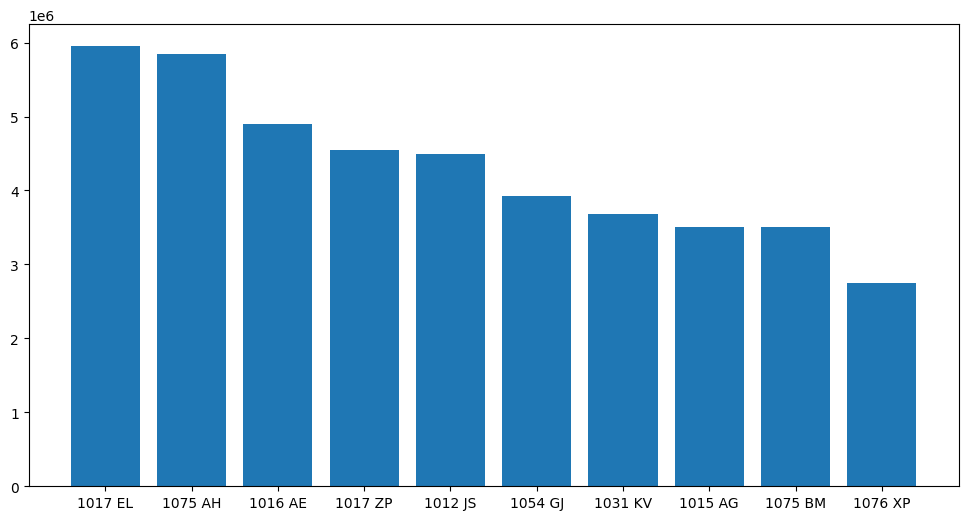

In [15]:
# Plot a bar chart in matplotlib with basic details:
plt.figure(figsize=(12, 6))

x = df_sorted['Zip'][0:10]
y = df_sorted['Price'][0:10]
plt.bar(x, y)

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000000.0, '1'),
  Text(0, 2000000.0, '2'),
  Text(0, 3000000.0, '3'),
  Text(0, 4000000.0, '4'),
  Text(0, 5000000.0, '5'),
  Text(0, 6000000.0, '6'),
  Text(0, 7000000.0, '7')])

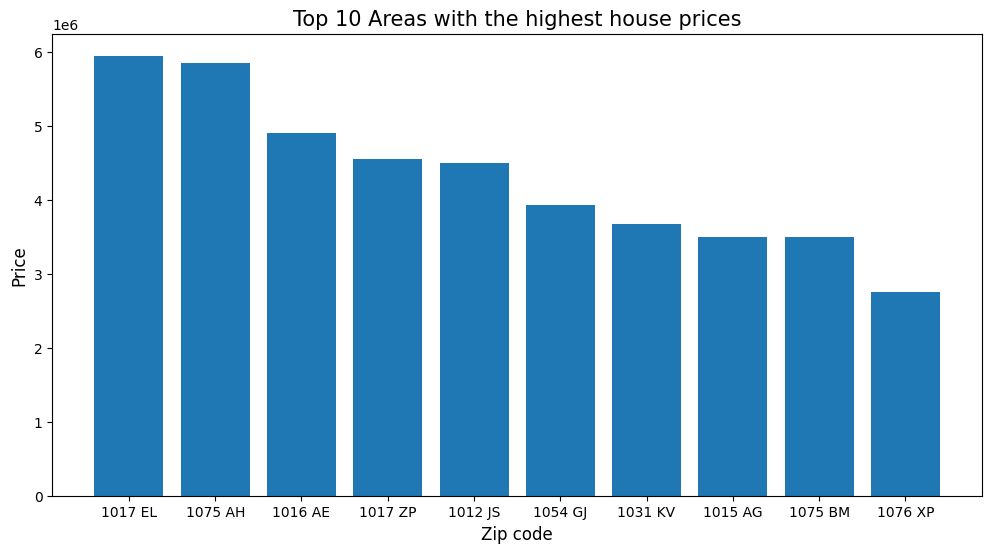

In [16]:
# Plot a bar chart in matplotlib with additional informative details such as the title, x label, and y label:
# Plot a bar chart in matplotlib with basic details:
plt.figure(figsize=(12, 6))

x = df_sorted['Zip'][0:10]
y = df_sorted['Price'][0:10]
plt.bar(x, y)
plt.title('Top 10 Areas with the highest house prices', fontsize=15)
plt.xlabel('Zip code', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

Text(0.5, 1.0, 'Top 10 Areas with the highest house prices per sqm')

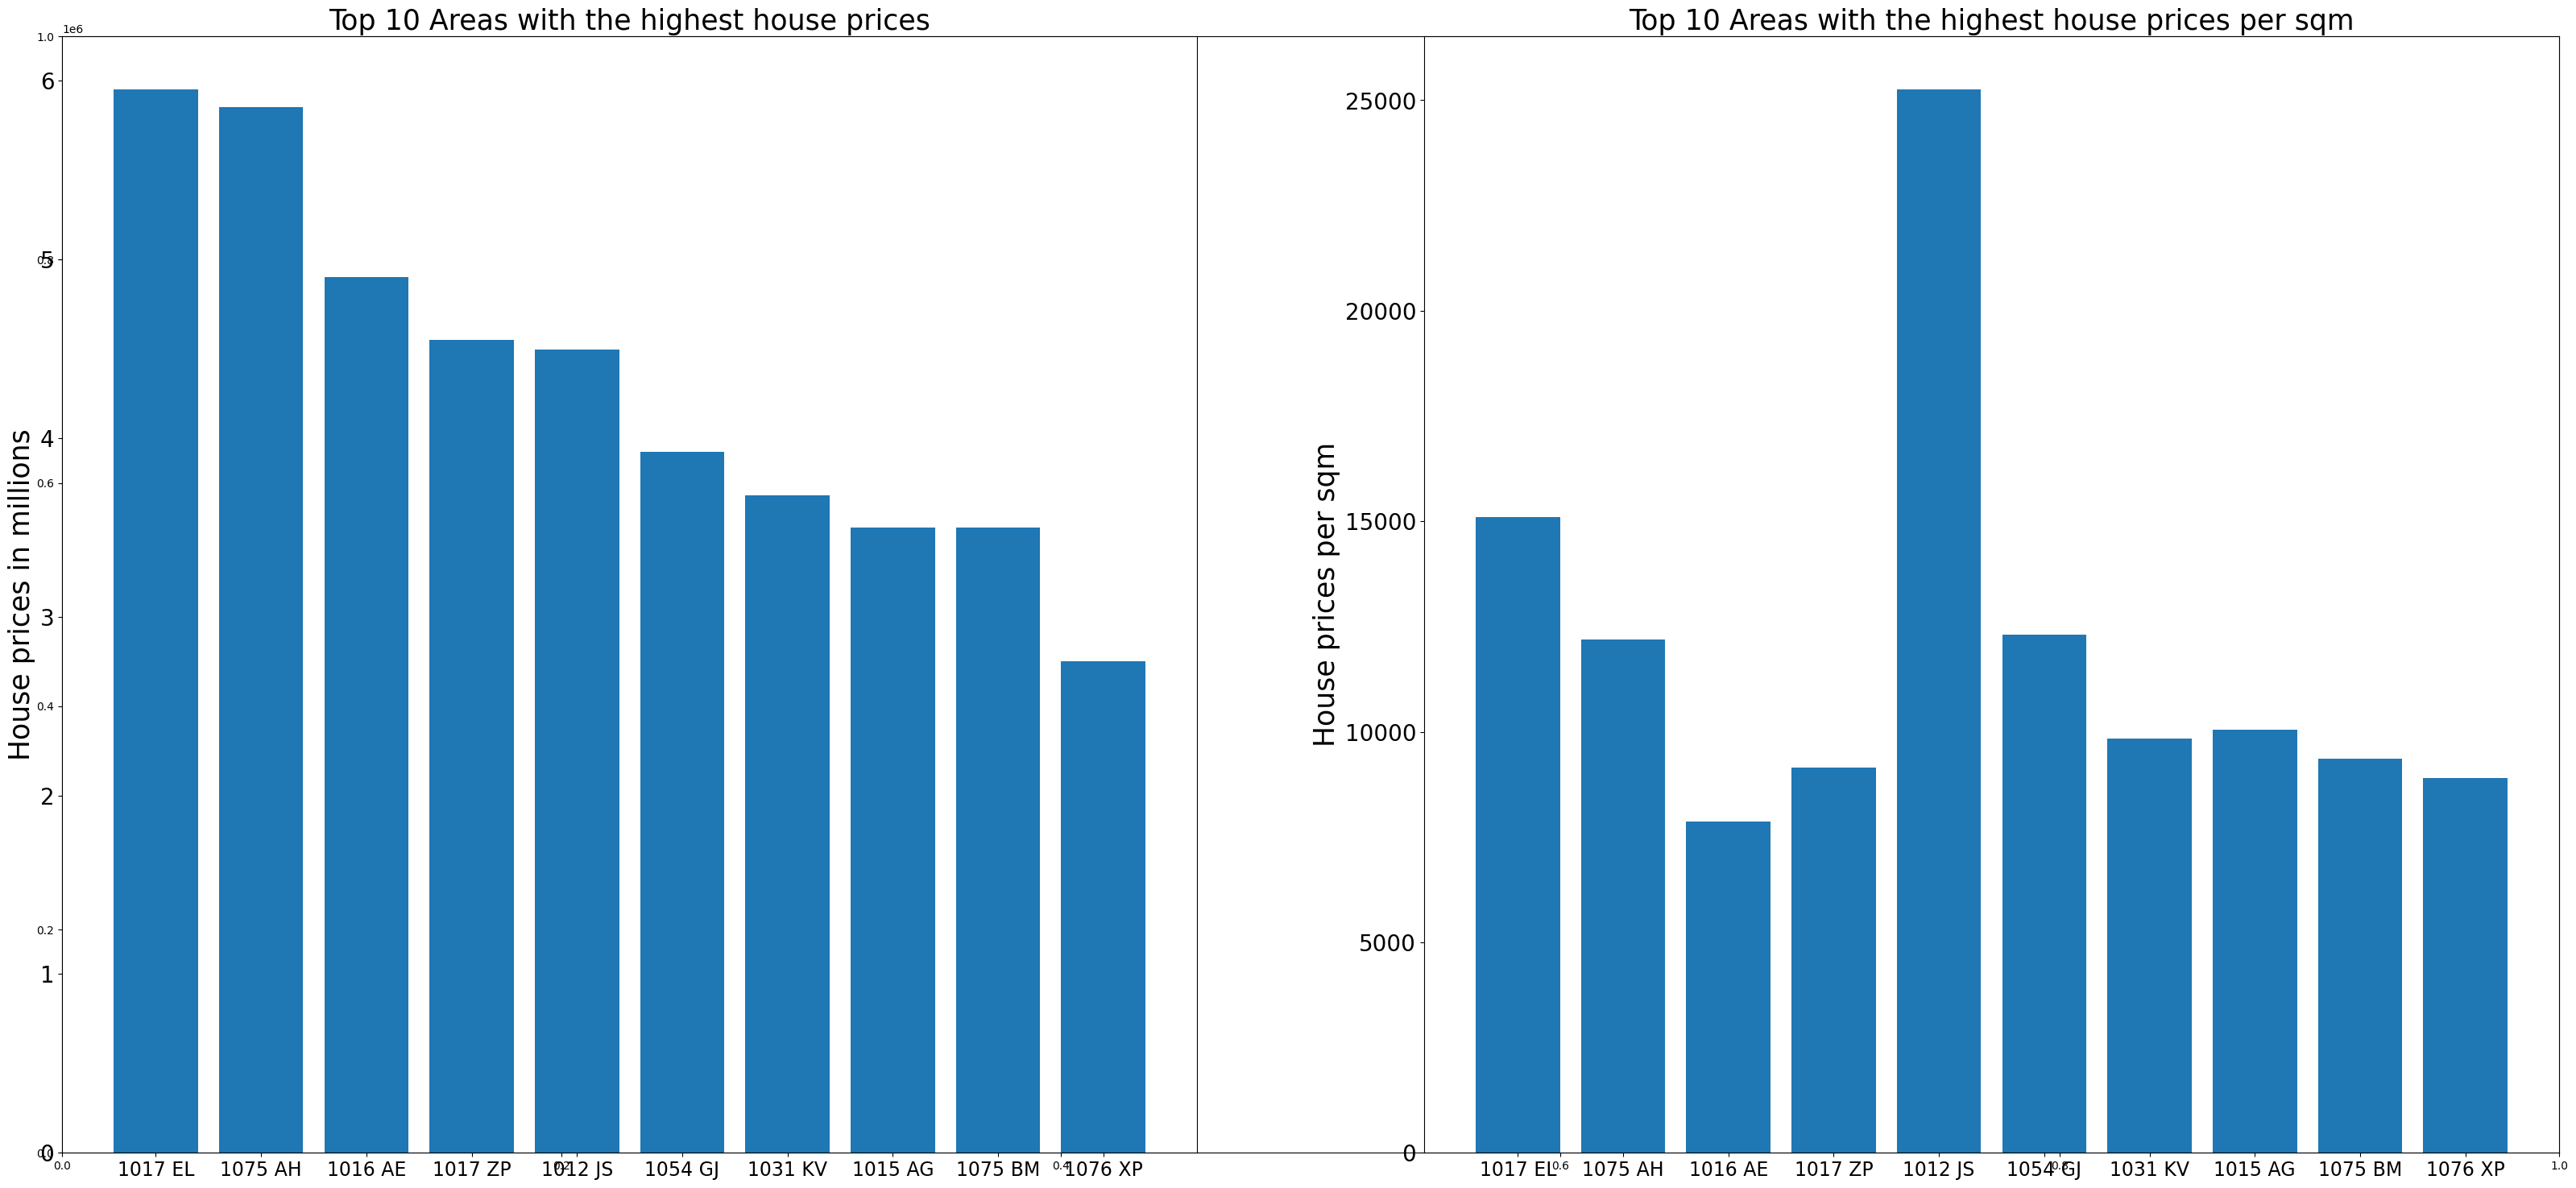

In [17]:
# Create subplots in matplotlib to view multiple perspectives at once:
fig, ax = plt.subplots(figsize = (40, 18))

x = df_sorted['Zip'][0:10]
y = df_sorted['Price'][0:10]
z = df_sorted['PriceperSqm'][0:10]

plt.subplot(1, 2, 1)
plt.bar(x, y)
plt.xticks(fontsize=17)
plt.ylabel('House prices in millions', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 Areas with the highest house prices', fontsize=25)

plt.subplot(1,2,2)
plt.bar(x,z)
plt.xticks(fontsize=17)
plt.ylabel('House prices per sqm', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 Areas with the highest house prices per sqm', fontsize=25)

- Visualizing data in Seaborn
Seaborn is another common Python data visualization library. It is based on matplotlib and integrates well with pandas data structures. Seaborn is primarily used for making statistical graphics, and this makes it a very good candidate for performing EDA. It uses matplotlib to draw its charts; however, this is done behind the scenes. Unlike matplotlib, seaborn’s high-level API  makes it easier and faster to use. As mentioned earlier, common tasks can sometimes be cumbersome in matplotlib and take several lines of code. Even though matplotlib is highly customizable, the settings can sometimes be hard to tweak. However, seaborn provides settings that are easier to tweak and understand.

Many of the important terms considered under the previous recipe also apply to seaborn, such as axes, ticks, legends, titles, labels, and so on. 

<Axes: xlabel='Zip', ylabel='Price'>

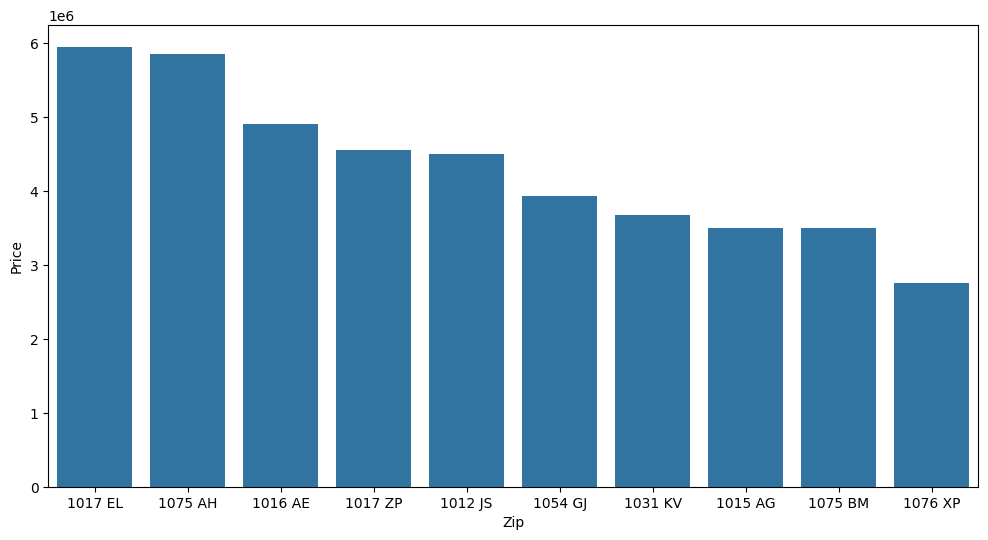

In [18]:
plt.figure(figsize= (12,6))
data = df_sorted[0:10]
sns.barplot(data= data, x= 'Zip',y = 'Price')

Text(0.5, 1.0, 'Top 10 Areas with the highest house prices')

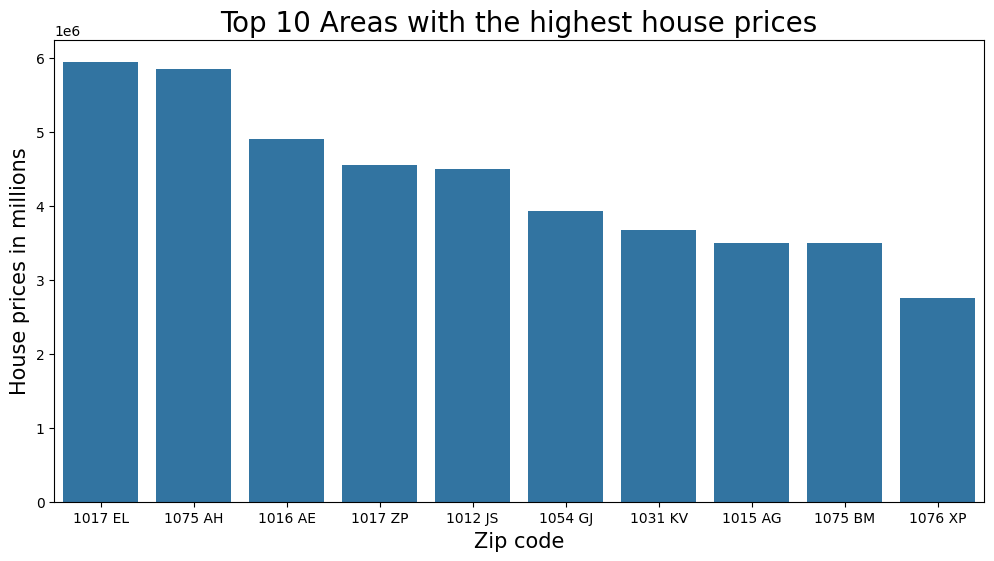

In [19]:
# Plot a bar chart in seaborn with additional informative details such as the title, x label, and y label:
plt.figure(figsize= (12,6))

data = df_sorted[0:10]
ax = sns.barplot(data= data, x= 'Zip', y = 'Price')
ax.set_xlabel('Zip code',fontsize = 15)
ax.set_ylabel('House prices in millions', fontsize = 15)
ax.set_title('Top 10 Areas with the highest house prices', fontsize= 20)

Text(0.5, 1.0, 'Top 10 Areas with the highest price per sqm')

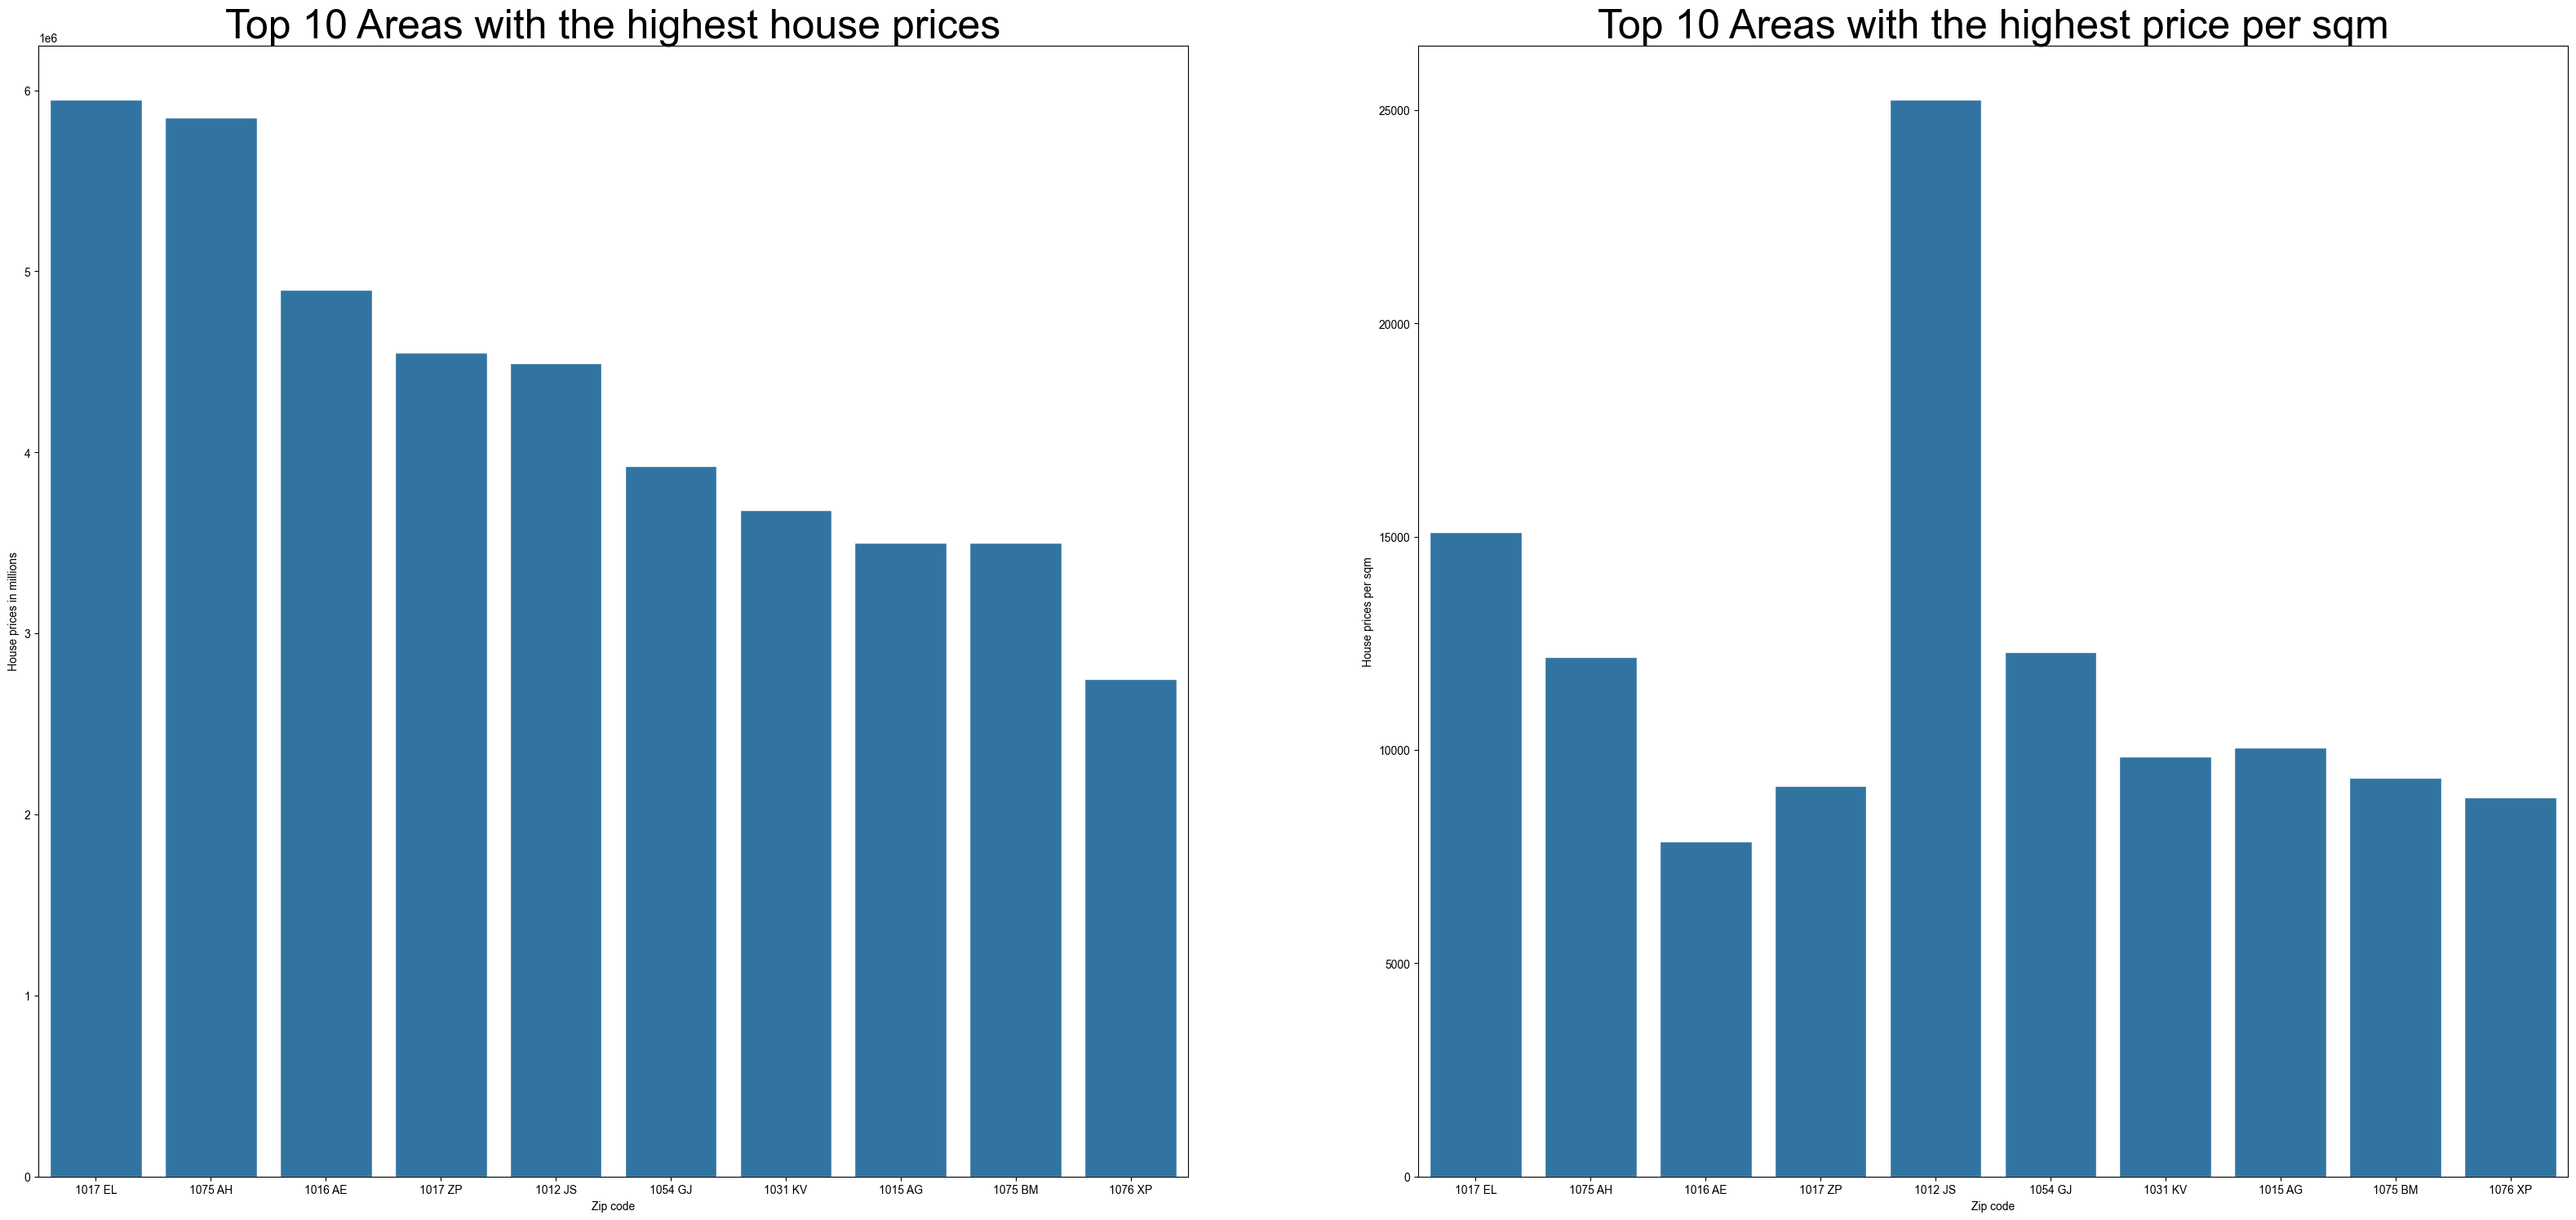

In [20]:
# Create subplots in seaborn to view multiple perspectives at once:
fig, ax = plt.subplots(1, 2,figsize=(40,18))

data = df_sorted[0:10]
sns.set(font_scale = 3)
ax1 = sns.barplot(data= data, x= 'Zip',y = 'Price', ax = ax[0])
ax1.set_xlabel('Zip code')
ax1.set_ylabel('House prices in millions')
ax1.set_title('Top 10 Areas with the highest house prices')

ax2 = sns.barplot(data= data, x= 'Zip',y = 'PriceperSqm', ax=ax[1])
ax2.set_xlabel('Zip code')
ax2.set_ylabel('House prices per sqm')
ax2.set_title('Top 10 Areas with the highest price per sqm')

- Visualizing data in GGPLOT
  - GGPLOT is an open source data visualization library originally built within the programming language R. Over the past few years, it has gained 
  significant popularity. It is an implementation of the grammar of graphics, which is a high-level framework for creating plots in a consistent 
  way. GGPLOT also has a Python implementation called plotnine. 
  - The grammar of graphics consists of seven components that abstract the low-level details and allow you to focus on building aesthetically appealing visualizations. The components include data, aesthetics, geometric objects, facets, statistical transformations, coordinates, and themes. These components are described here:
    - Data: This refers to the data we plan to visualize.
    - Aesthetics: This refers to the variables we want to plot, that is, a single variable (x variable) or multiple variables (x and y variables).
    - Geometric object: This refers to the graph we plan to use. An example could be a histogram or bar plot.
    - Facets: This helps us break our data into subsets and visualize these subsets across multiple plots arranged next to each other.
    - Statistical transformations: This refers to transformations such as summary statistics, for example, mean, median, and so on, to be performed on the data.
    - Coordinates: This refers to the coordinate options available. This is a Cartesian coordinate system by default.
    - Themes: The themes provide appealing design options on how to best visualize data. This includes the background color, legend, and so on.

In [22]:
from plotnine import *

In [24]:
df_sorted.head()

,Zip,Price,Area,Room,PriceperSqm
195,1017 EL,5950000.0,394,10,15101.522843
837,1075 AH,5850000.0,480,14,12187.500000
305,1016 AE,4900000.0,623,13,7865.168539
103,1017 ZP,4550000.0,497,13,9154.929577
179,1012 JS,4495000.0,178,5,25252.808989


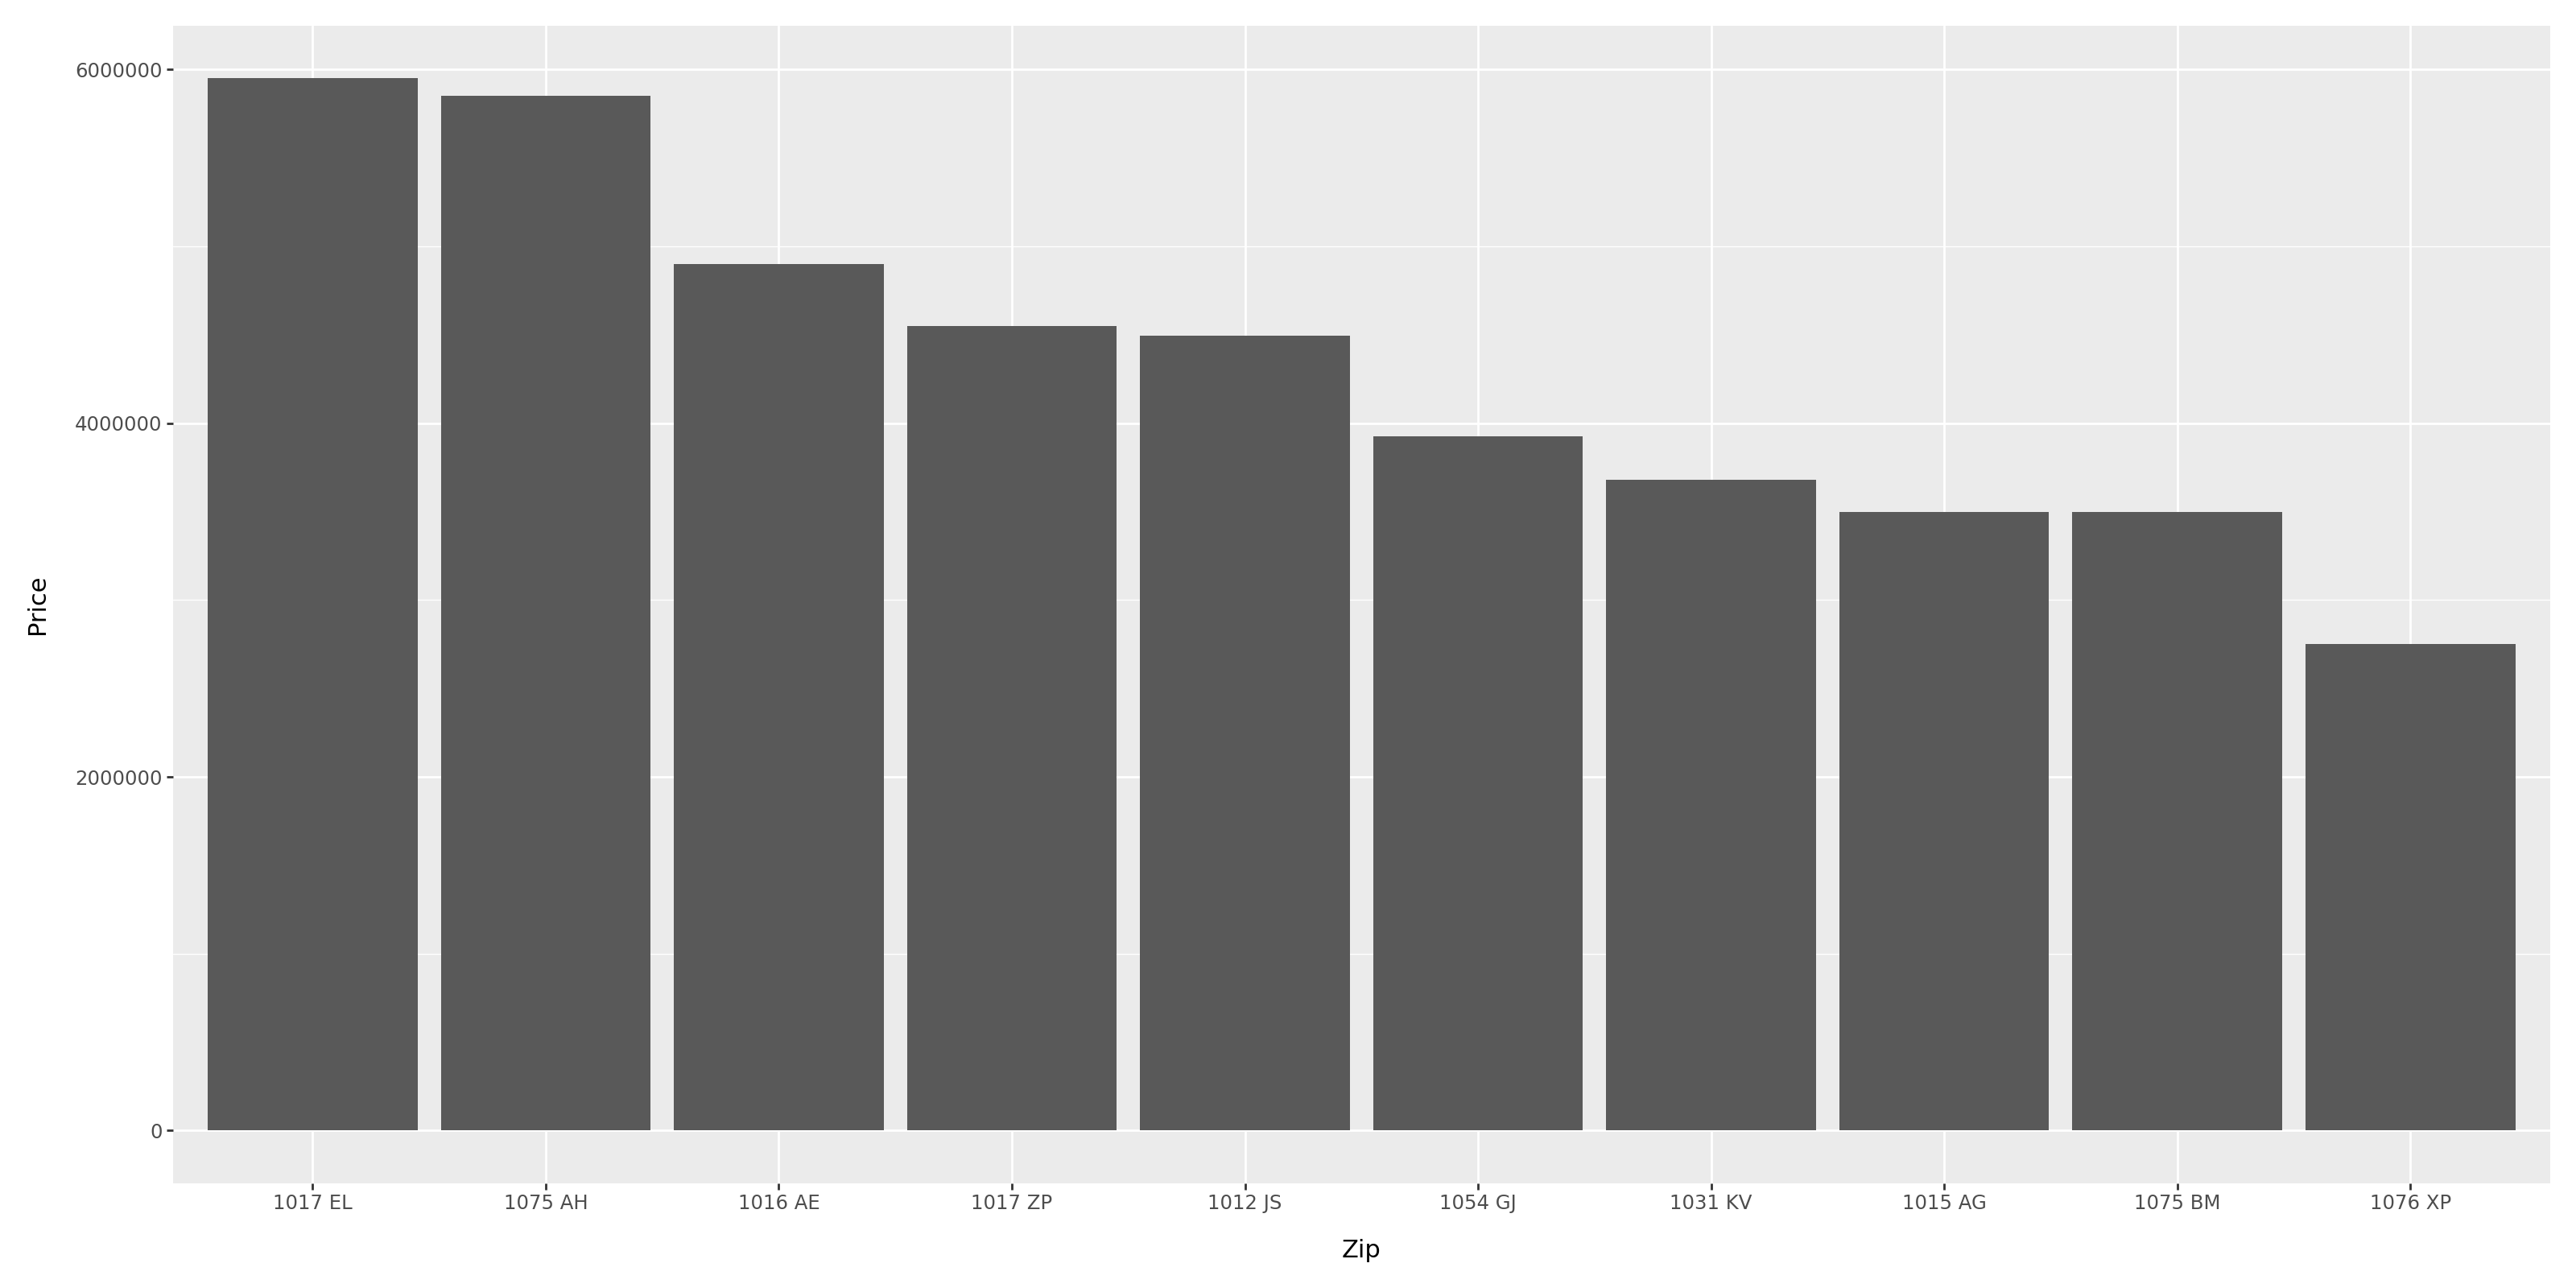

In [28]:
# Plot a bar chart in GGPLOT with basic details

chart_data = df_sorted[0:10]

ggplot(chart_data,aes(x='Zip',y = 'Price')) + geom_bar(stat = 'identity') + scale_x_discrete(limits=chart_data['Zip'].tolist()) + theme(figure_size=(16, 8))

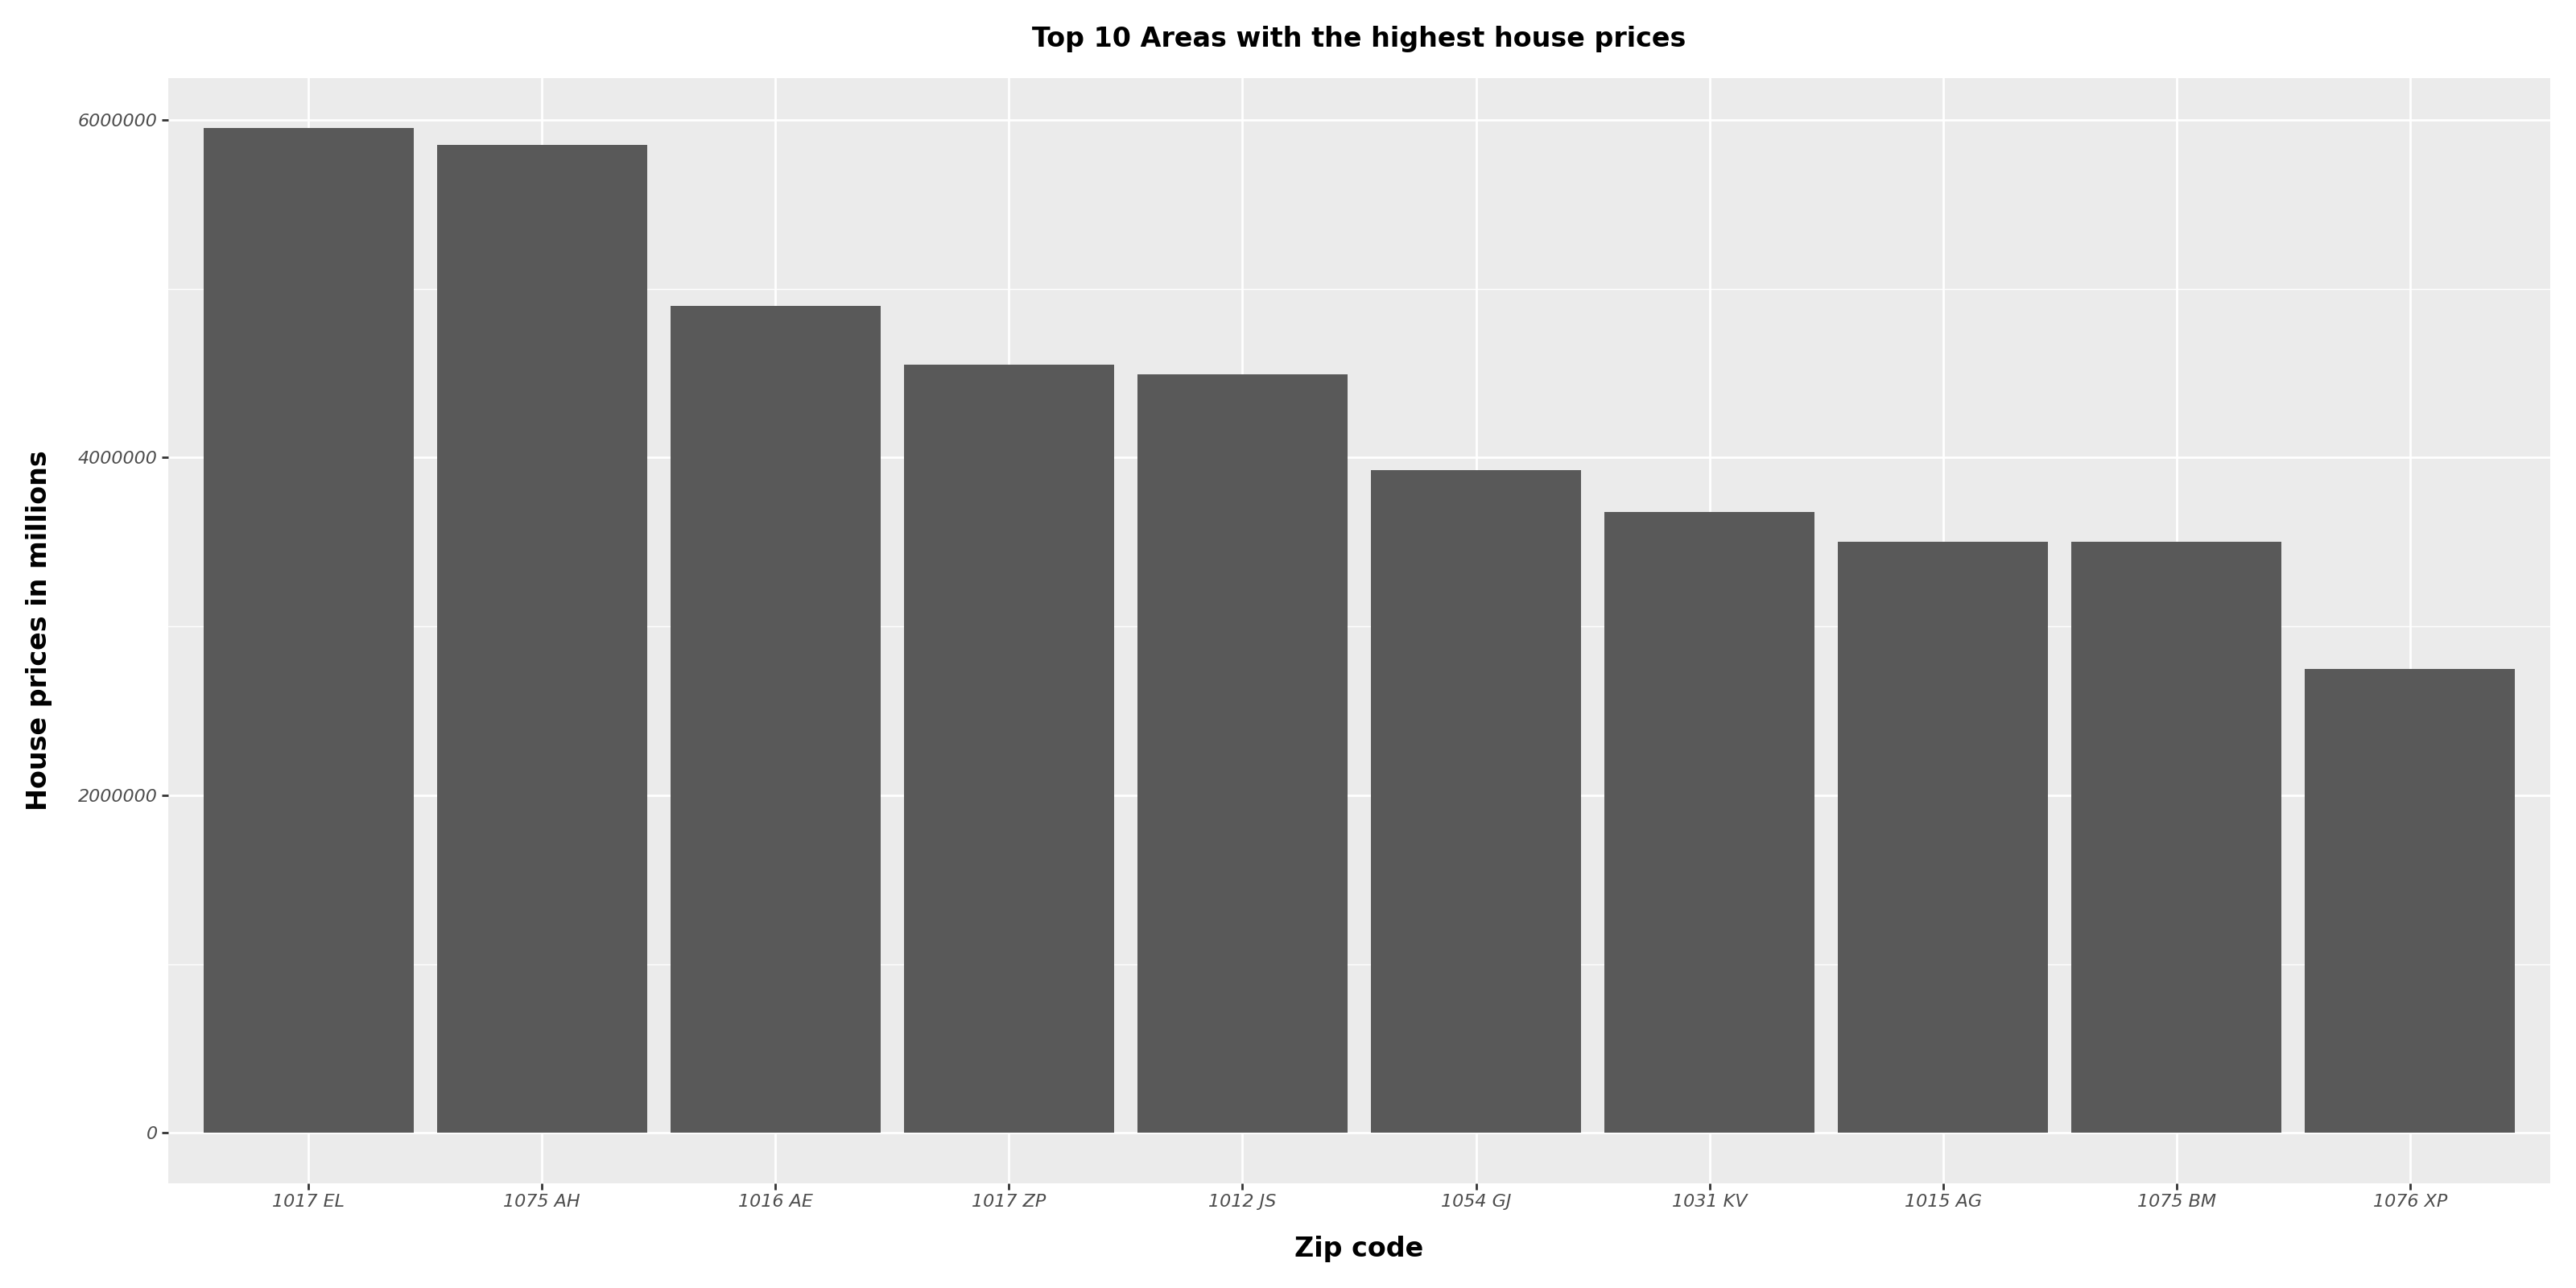

In [34]:
# Plot a bar chart in GGPLOT with additional informative details such as the title, x label, and y label:

ggplot(chart_data,aes(x='Zip',y = 'Price')) + geom_bar(stat = 'identity') + scale_x_discrete(limits=chart_data['Zip'].tolist())  + labs(y='House prices in millions', x='Zip code', title='Top 10 Areas with the highest house prices')  + theme(figure_size=(16, 8), axis_title=element_text(face='bold',size =12), axis_text=element_text(face='italic',size=8), plot_title=element_text(face='bold',size=12))

- Visualizing data in Bokeh
  - Bokeh is another popular data visualization library in Python. Bokeh provides interactive and aesthetically appealing charts. These charts allow users to probe many scenarios interactively. Bokeh also supports custom JavaScript for special and advanced visualization use cases. With it, charts can
be easily embedded into web pages.
  - Glyphs are the building blocks of bokeh visualizations. A glyph is a geometrical shape or marker that is used to represent data and create plots in bokeh. Typically, a plot consists of one or many geometrical shapes such as line, square, circle, rectangle, and so on. These shapes (glyphs) have visual information about the corresponding set of data.

In [35]:
from bokeh.plotting import figure, show
import bokeh.plotting as bk_plot
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [37]:
# Plot a bar chart in bokeh with basic details:
data = df_sorted[0:10]

fig = figure(x_range = data['Zip'], width = 700, height = 500)
fig.vbar(x= data['Zip'], top = data['Price'], width = 0.9)
show(fig)

In [39]:
# Plot a bar chart in bokeh with additional informative details

fig = figure(x_range = data['Zip'], width = 700, height = 500, title = 'Top 10 Areas with the highest house prices', x_axis_label = 'Zip code', y_axis_label = 'House prices in millions')

fig.vbar(x= data['Zip'], top = data['Price'], width = 0.9)
fig.xaxis.axis_label_text_font_size = "15pt"
fig.xaxis.major_label_text_font_size = "10pt"
fig.yaxis.axis_label_text_font_size = "15pt"
fig.yaxis.major_label_text_font_size = "10pt"
fig.title.text_font_size = '15pt'
show(fig)

In [41]:
# Create subplots in bokeh to view multiple perspectives at once:
p1 = figure(x_range = data['Zip'], width = 480, height= 400, title = 'Top 10 Areas with the highest house prices', x_axis_label = 'Zip code', y_axis_label = 'House prices in millions') 

p1.vbar(x= data['Zip'], top = data['Price'], width = 0.9)
p2 = figure(x_range = data['Zip'], width = 480, height = 400, title = 'Top 10 Areas with the highest house prices per sqm', x_axis_label = 'Zip code',y_axis_label = 'House prices per sqm')

p2.vbar(x= data['Zip'], top = data['PriceperSqm'], width = 0.9)
gp = bk_plot.gridplot(children=[[p1, p2]])
bk_plot.show(gp)